In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import time

In [2]:
dataframe3 = pd.read_excel('COVID-19 US state policy database 6_10_2021.xlsx')
df2 = pd.read_csv('time_series_covid_19_confirmed_US.csv')

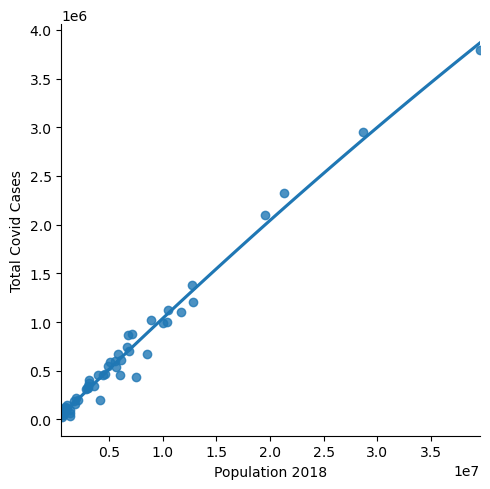

In [3]:
states = (df2['Province_State'].unique())
row = []
popValues = []
for state in states:
    r = df2.loc[df2["Province_State"] == state, "5/29/21"]
    sum_row = r.sum(axis=0)
    row.append(sum_row)
df = pd.DataFrame(row) 
df.columns = ["Total Covid Cases"]
for index, state in enumerate(states):
    df.rename(index={index: state}, inplace=True)
df = df.drop(["American Samoa", "Diamond Princess", "Grand Princess", "Northern Mariana Islands", "Guam", "Puerto Rico", "Virgin Islands" ], axis=0)
r = dataframe3.loc[:,"POP18"]
for index, val in enumerate(r):
    if index > 3:
        popValues.append(val)
df["Population 2018"] = popValues

sns.lmplot(x ="Population 2018", y ="Total Covid Cases", data = df, order = 2, ci = None)


In [32]:
def linear_regression(X_test, y_test, alpha, iterations, num_image_updates):
    w = 0
    b = 0
    step_size = iterations/num_image_updates

    for i in range(iterations):
        dJ_dw = 0
        dJ_db = 0
        for j in range(len(X_test)):
            dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
            dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db

        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        if i % step_size == 0:
            plt.clf()
            plt.scatter(X_test, y_test, color ='b')
            plt.plot(X_test, y_pred, color ='k')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(1)
    
    parameters = (w, b)
    return parameters

(array([0.10376342]), array([7.43663726e-09]))


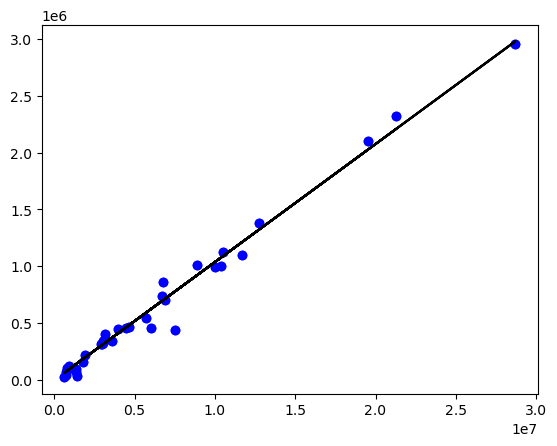

In [33]:
X = np.array(df['Population 2018']).reshape(-1, 1)
y = np.array(df['Total Covid Cases']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

alpha = 10 ** -16
iterations = 1000
num_image_updates = 20
parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates)
print(parameters)

y_pred = np.empty([len(X_test), 1])
for i in range(len(X_test)):
    y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [6]:
#y_pred = regr.predict(X_test)
#r2 = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
#print(r2)
#print(rmse)
#plt.scatter(X_test, y_test, color ='b')
#plt.plot(X_test, y_pred, color ='k')
#plt.show()

NameError: name 'regr' is not defined